In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('./data.csv')

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df[df['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [9]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', "0.0")

In [10]:
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [11]:
df.drop(columns = ['customerID'], inplace= True)

In [12]:
numeric_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [13]:
categorical_columns = []

for col in df.columns:
  if col not in numeric_columns:
    print(col, df[col].unique())
    print('-'*50)
    categorical_columns.append(col)

gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport ['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingTV ['No' 'Yes' 'No internet 

In [14]:
def plot_histogram(column_name):
  plt.figure(figsize= (6, 4))
  sns.histplot(x=df[column_name], kde= True)
  plt.title(f"Distribution of {column_name}")
  plt.show()

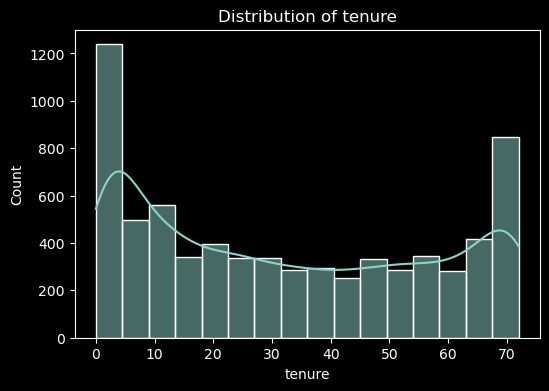

In [15]:
plot_histogram('tenure')

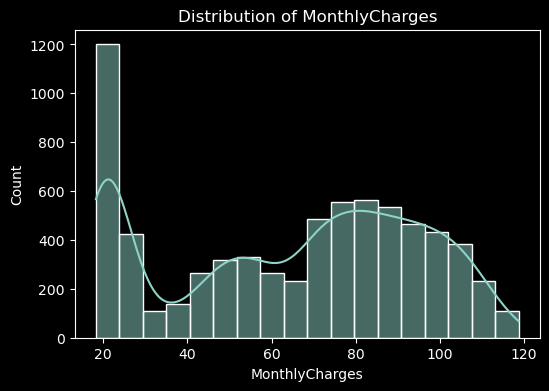

In [16]:
plot_histogram('MonthlyCharges')

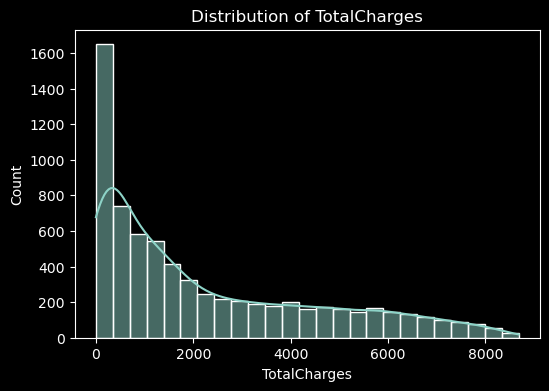

In [17]:
plot_histogram('TotalCharges')

In [18]:
def plot_boxplot(column_name):
  plt.figure(figsize= (6, 4))
  sns.boxplot(df[column_name])
  plt.title(f"Box plot for {column_name}")
  plt.show()

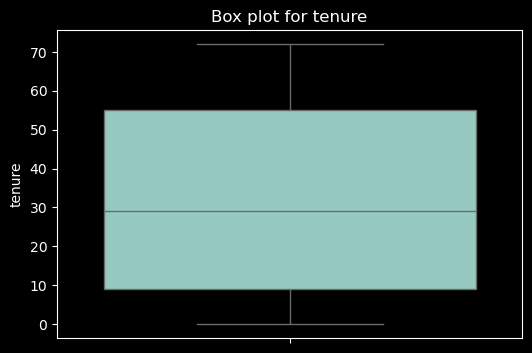

In [19]:
plot_boxplot('tenure')

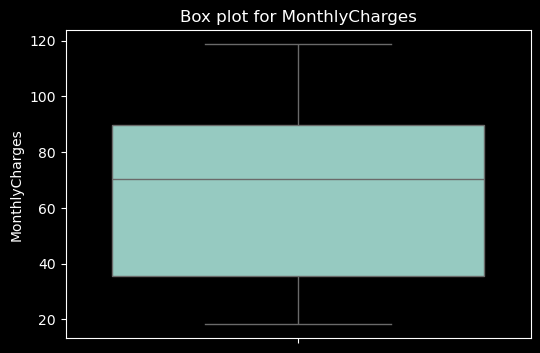

In [20]:
plot_boxplot('MonthlyCharges')

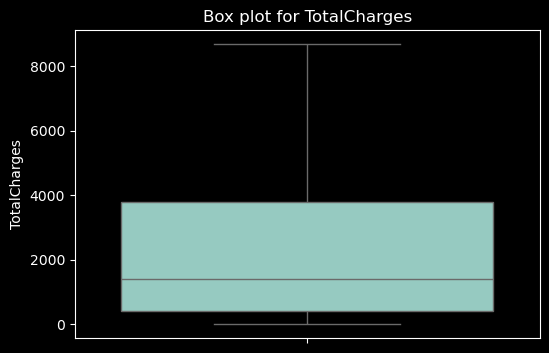

In [21]:
plot_boxplot('TotalCharges')

In [22]:
sns.heatmap(df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr(), annot= True)

<Axes: >

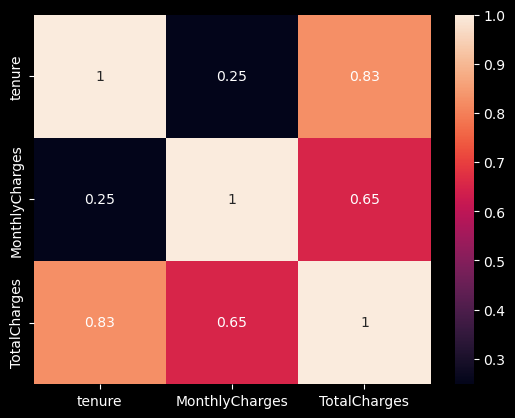

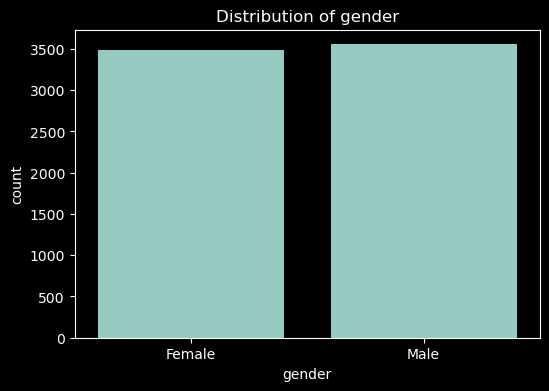

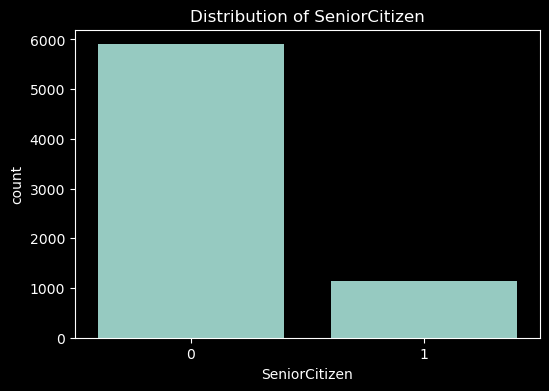

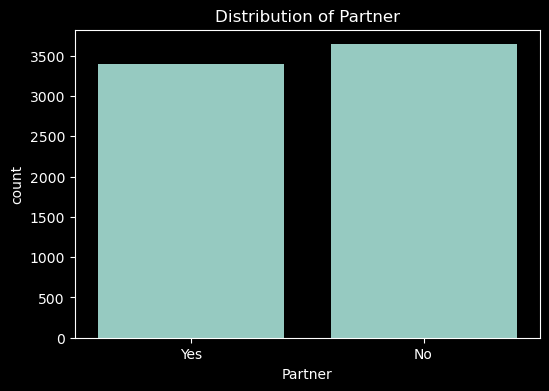

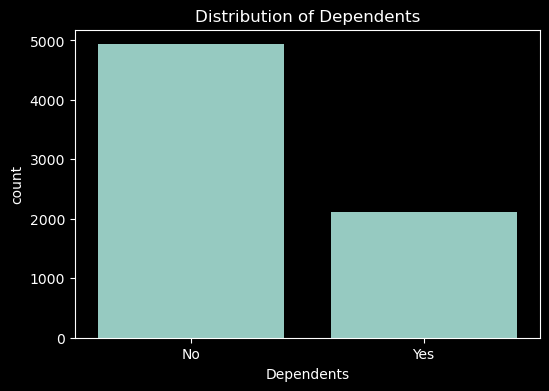

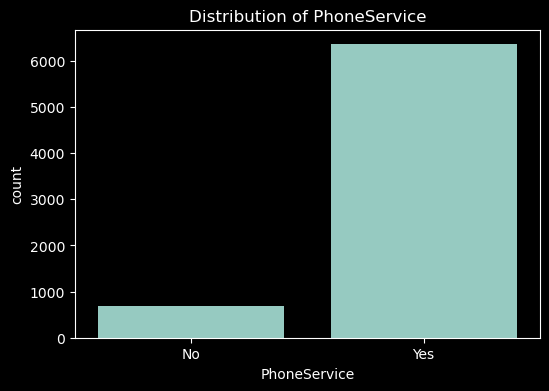

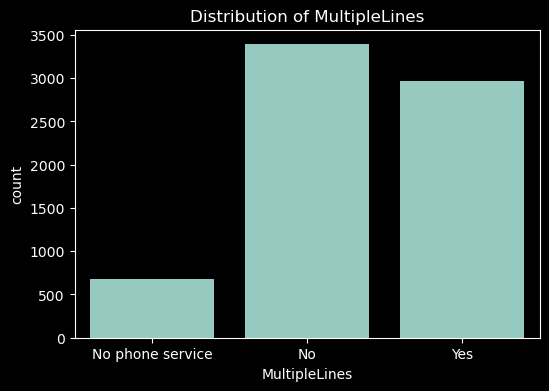

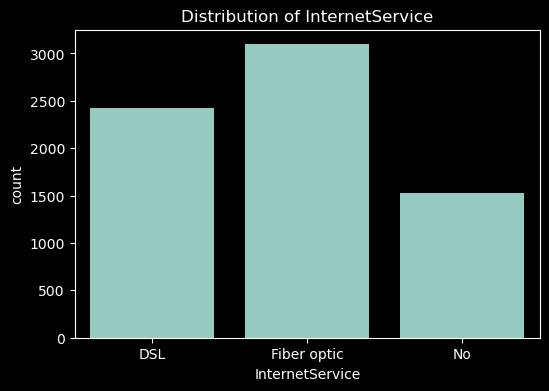

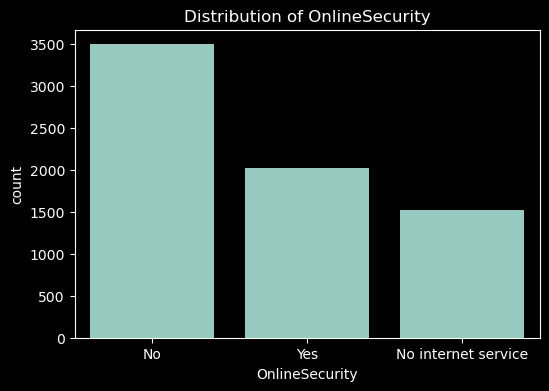

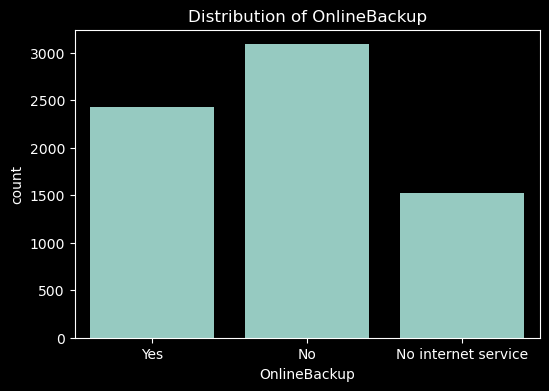

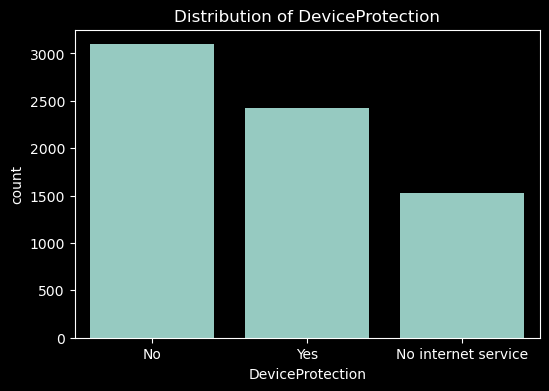

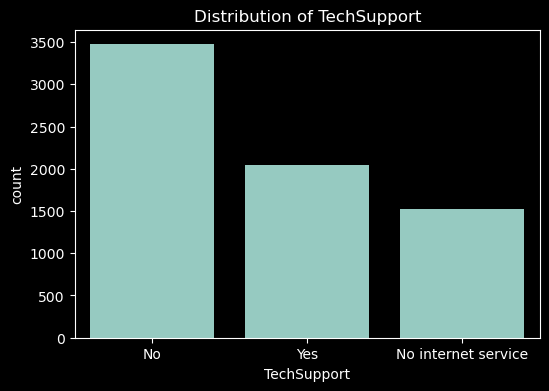

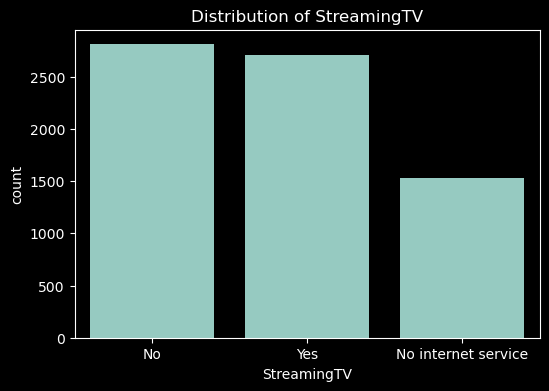

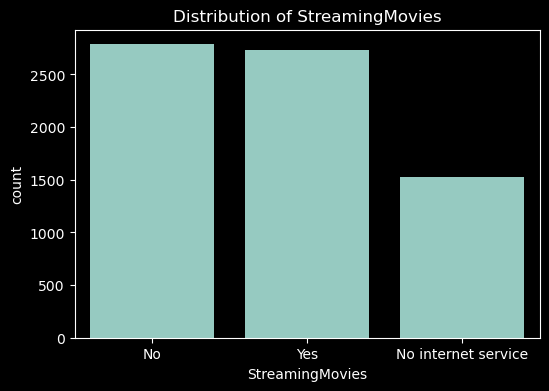

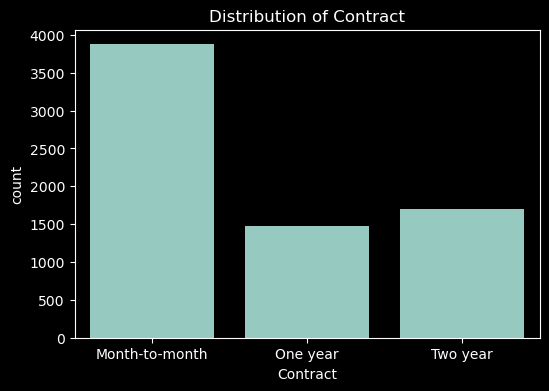

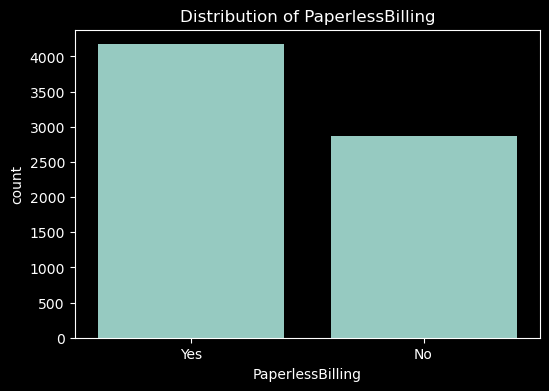

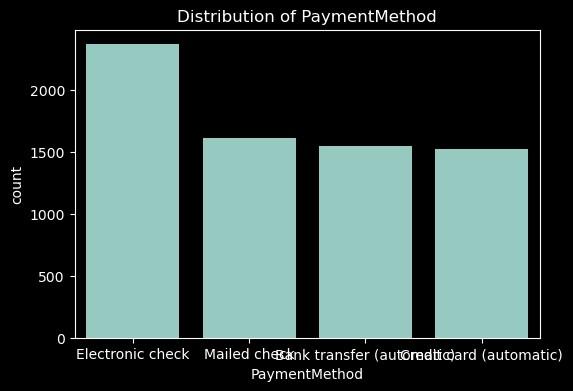

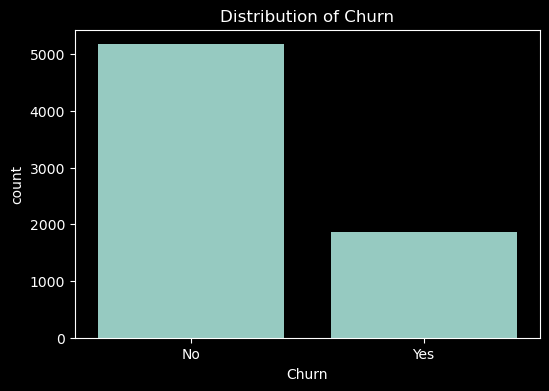

In [23]:
for col in categorical_columns:
  plt.figure(figsize= (6, 4))
  sns.countplot(x=df[col])
  plt.title(f"Distribution of {col}")
  plt.show()

In [24]:
cols = categorical_columns

In [25]:
cols.remove("SeniorCitizen")

In [26]:
encoders = {}

for col in cols:
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col])
  encoders[col] = le

In [27]:
x = df.drop(columns=['Churn'], axis= 1)
y = df['Churn']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state= 42)

In [29]:
X_train_smote, y_train_smote = SMOTE().fit_resample(X_train, y_train)

In [30]:
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier()
}

for name, model in models.items():
  print(f"Model: {name}")
  score = cross_val_score(model, X_train_smote, y_train_smote, cv = 5, scoring= 'accuracy')
  print(f"Accuracy: {np.mean(score):.2f}")
  print('-'*50)

Model: Decision Tree
Accuracy: 0.78
--------------------------------------------------
Model: Random Forest
Accuracy: 0.84
--------------------------------------------------
Model: XGBoost
Accuracy: 0.83
--------------------------------------------------


In [31]:
estimator = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 4, 5, 10],
    'min_samples_leaf': [1, 2, 3, 5, 0.5],
    'max_features': ['sqrt', 'log2', None]
}

random_rfc = RandomizedSearchCV(estimator, param_grid, cv=5, scoring='accuracy', n_iter = 50, n_jobs= -1, verbose=1)
random_rfc.fit(X_train_smote, y_train_smote)

print(random_rfc.best_score_)
print(random_rfc.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
0.8428103244450282
{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 15, 'criterion': 'gini'}


In [32]:
best_rfc = random_rfc.best_estimator_

y_pred = best_rfc.predict(X_test)

print(f'accuracy: {accuracy_score(y_test, y_pred):.2f}')
print(f'confusion matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'classification report: \n{classification_report(y_test, y_pred)}')

accuracy: 0.79
confusion matrix: 
[[860 176]
 [126 247]]
classification report: 
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1036
           1       0.58      0.66      0.62       373

    accuracy                           0.79      1409
   macro avg       0.73      0.75      0.74      1409
weighted avg       0.80      0.79      0.79      1409



In [33]:
estimator = XGBClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

random_xgc = RandomizedSearchCV(estimator, param_grid, cv=5, scoring='accuracy', n_iter = 200, n_jobs= -1, verbose=1)
random_xgc.fit(X_train_smote, y_train_smote)

print(random_xgc.best_score_)
print(random_xgc.best_params_)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
0.8370125662244406
{'subsample': 0.8, 'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 0.8}


In [34]:
best_xgc = random_xgc.best_estimator_

y_pred = best_xgc.predict(X_test)

print(f'accuracy: {accuracy_score(y_test, y_pred):.2f}')
print(f'confusion matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'classification report: \n{classification_report(y_test, y_pred)}')

accuracy: 0.79
confusion matrix: 
[[877 159]
 [138 235]]
classification report: 
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1036
           1       0.60      0.63      0.61       373

    accuracy                           0.79      1409
   macro avg       0.73      0.74      0.73      1409
weighted avg       0.79      0.79      0.79      1409



In [41]:
import joblib

# joblib.dump(encoders, 'encoders.joblib')
# joblib.dump((X_train_smote, X_test, y_train_smote, y_test), 'splited_data.joblib')
# joblib.dump(best_rfc, 'rfc.joblib')
# joblib.dump(best_xgc, 'xgc.joblib')
joblib.dump(x.columns, 'columns.joblib')

['columns.joblib']